#  **Development of a Sign Language Dictionary App Using Supervised Learning**

## **Project Overview**


This project develops a sign language dictionary app that translates English text into American Sign Language (ASL) using supervised machine learning models, namely Decision Trees. Targeting the global deaf and hard-of-hearing population, which constitutes over 430 million people with disabling hearing loss, the app aims to foster better communication accessibility. Through the application, users input English text and receive visual representations of ASL, enhancing interaction capabilities within the deaf community and with the hearing world. This paper elaborates on the methodologies used for data preparation, model implementation, performance evaluation, and discusses the application's significant potential for social impact.

<br>

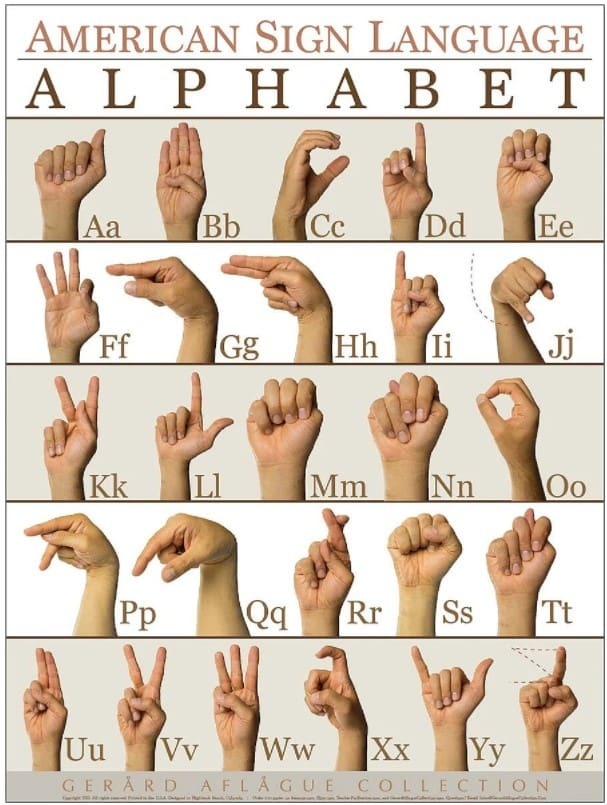

<br>

Decision trees, while less common in image-based SLR, are straightforward to interpret and can be useful for feature engineering stages of image data. Ensemble methods like Random Forests improve upon single decision trees by reducing overfitting and improving the generalizability of the model.

## **Approach**

* Install Packages
* Import Libraries
* Data Loading and transformdata
* Exploratory Data Analysis
* Train - Test Split
* Decision Tree
* Model Summary
* Function convert text to sign language

### Install Packages and Import Libraries

## **Important Libraries**
 
* **pandas**: pandas is a fast, powerful, flexible, and easy-to-use open-source data analysis and manipulation tool built on top of the Python programming language.
 
* **NumPy**: The fundamental package for scientific computing with Python. Fast and versatile, the NumPy vectorization, indexing, and broadcasting concepts are the de-facto standards of array computing today. NumPy offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more.
 
* **Matplotlib**: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
 
* **seaborn**: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
 
* **scikit-learn**: Simple and efficient tools for predictive data analysis
accessible to everybody and reusable in various contexts.
It is built on NumPy, SciPy, and matplotlib to support machine learning in Python.

* **OS**: The os library in Python provides a way of using operating system dependent functionality. It allows you to interface with the underlying operating system that Python is running on – be it Windows, Mac or Linux

* **CV2**: cv2 is the Python interface for OpenCV, which stands for Open Source Computer Vision Library. OpenCV is a robust library used for computer vision tasks. It contains numerous functions for image processing, including reading and writing images, image transformations like resizing and converting color spaces.

* **tqdm**: tqdm is a Python library that provides a fast, extensible progress bar for loops and other iterable processing.

In [1]:
#import nessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from tqdm import tqdm

### Data Collection and Preprocessing

The dataset consists of images that are organized into a directory structure where each subdirectory corresponds to a label for a class, which is typical in image classification tasks. The labels are assumed to be the names of these subdirectories.

1. Grayscale Conversion: Each image from the subdirectories is read and converted into grayscale. Grayscale images are easier to process since they reduce the dimensionality of the data from three color channels to a single channel, emphasizing the structural information in the image.
2. Image Resizing: The grayscale images are then resized to a consistent shape of 64x64 pixels. This standardization is important to ensure that all input data fed into the model has the same size, which is required for the subsequent machine learning algorithms to work effectively.

3. Flattening: Post resizing, each 2D image array is flattened into a 1D array. This transformation creates a feature vector for each image where every pixel’s intensity becomes a feature, simplifying the data structure for the machine learning model.

4. Label Encoding: A mapping is created to encode the textual labels (subdirectory names) into numeric form, which is necessary because machine learning algorithms work with numerical values rather than text data.

5. Dataset Creation: The flattened image data and their corresponding numerical labels are compiled into numpy arrays to form the final dataset ready for training. Numpy arrays are a standard format for datasets in machine learning pipelines, offering efficient storage and computational advantages.

6. DataFrame Conversion: For better inspection and manipulation, the image and label arrays are converted into a pandas DataFrame. In this DataFrame, each row corresponds to an image with columns for every pixel and an additional column for the label.

In [2]:
#create function to load data set and generate size of images
def load_data(directory, target_size=(64, 64)):
    labels = []
    images = []
    label_dict = {name: num for num, name in enumerate(os.listdir(directory))}
    for label in tqdm(os.listdir(directory)):
        class_path = os.path.join(directory, label)
        for img_path in os.listdir(class_path):
            img = cv2.imread(os.path.join(class_path, img_path), cv2.IMREAD_GRAYSCALE)  # load in grayscale
            img = cv2.resize(img, target_size)  # resize image
            img = img.flatten()  # flatten the image from 2D to 1D
            images.append(img)
            labels.append(label_dict[label])
    images = np.array(images)
    labels = np.array(labels)
    return images, labels, label_dict

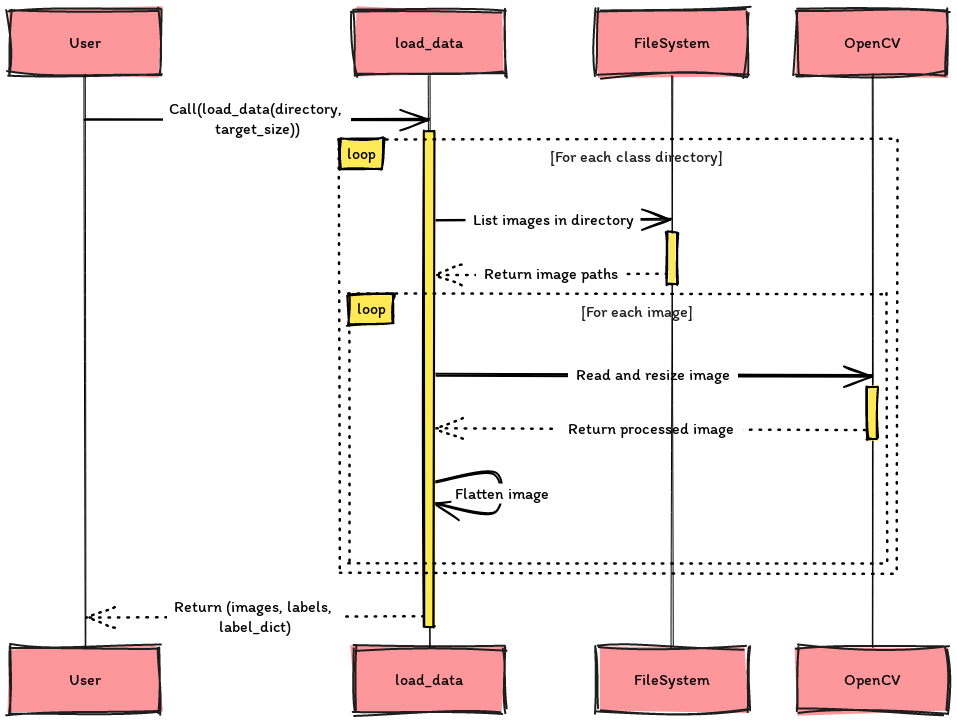

In [3]:
#using the load_data function to load data set
images, labels, label_dict = load_data("my-path")

100%|██████████| 29/29 [10:39<00:00, 22.07s/it]


In [4]:
df = pd.DataFrame(images, columns=[f'pixel{i}' for i in range(images.shape[1])])
df['label'] = labels

print(df.head())

   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      28      29      31      30      32      31      33      33      30   
1      28      29      31      30      31      31      34      30      32   
2      27      29      30      30      31      30      32      32      32   
3      27      30      31      31      29      33      31      30      32   
4      25      33      35      36      34      35      35      36      35   

   pixel9  ...  pixel4087  pixel4088  pixel4089  pixel4090  pixel4091  \
0      33  ...        147        143        142        142        142   
1      31  ...        144        143        142        142        140   
2      33  ...        143        144        141        142        138   
3      33  ...        146        145        145        144        145   
4      37  ...        160        154        158        159        161   

   pixel4092  pixel4093  pixel4094  pixel4095  label  
0        140        140        137        1

### Exploratory Data Analysis(EDA)

Exploratory Data Analysis (EDA) plays a pivotal role in the preprocessing phase of the American Sign Language (ASL) recognition project. This analytical process involves a thorough inspection of the dataset to understand the distribution of the various classes and to visualize sample images. EDA is crucial for assessing the balance and integrity of the data before it enters the modeling stage.

Visualization of sample images is another important aspect of EDA. By visually inspecting a subset of the dataset, researchers can confirm the quality and consistency of the images. This includes checking for any anomalies or outliers in the images, such as images that are too dark, too bright, or that do not correctly represent the intended ASL sign. Visualization also helps in understanding how well the preprocessing steps like resizing and grayscale conversion have been executed, ensuring that these transformations maintain the essential features necessary for accurate sign language recognition.

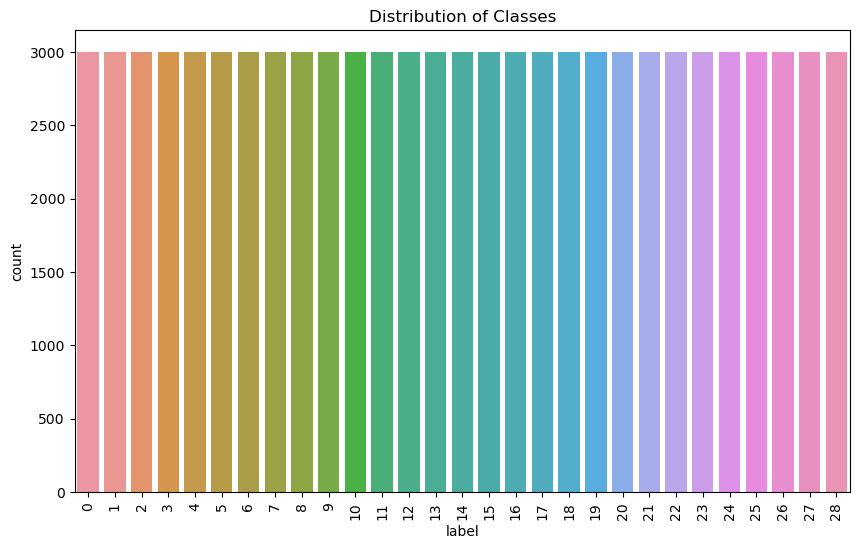

In [5]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)

plt.title("Distribution of Classes")
plt.xticks(rotation=90)
plt.show()

As the visualization I have 28 labels and each labels contain 3000 images

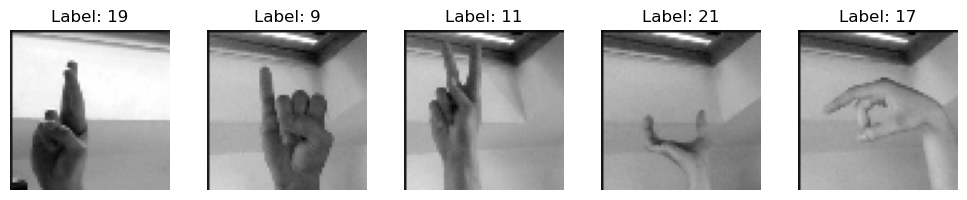

In [31]:
def display_sample_images(df, num_images=5):
    sample_images = df.sample(n=num_images, random_state=42)
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
    
    for i, ax in enumerate(axes.flat):
        # Reshape the flattened pixels back to 2D array
        img = sample_images.iloc[i][:-1].values.reshape(64, 64)
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Label: {sample_images.iloc[i]['label']}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display sample images from the DataFrame
display_sample_images(df)

### Modeling

**Decision Tree Classifier**

A Decision Tree is a versatile supervised learning algorithm that is widely used for both classification and regression tasks. It constructs a model in the form of a tree structure, breaking down data sets into smaller subsets while simultaneously developing an associated decision tree. The tree consists of decision nodes, which represent the "questions" or tests on specific attributes, and leaf nodes, which are the outcomes or final decisions. This method is valued for its simplicity and interpretability, as it does not require statistical knowledge to understand and can be visualized easily, making it accessible for users from various fields.

<br>

![image](https://miro.medium.com/v2/resize:fit:640/format:webp/1*X6oc3M7UfnO5K1tEZ-K94w.png)

<br>

Decision tree is actually very intuitive and easy to understand. It is basically a set of Yes/No or if/else questions. Below is a typical diagram of decision tree

<br>

![image](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*3buWChRHuasrTI2iJfCCnA.png)

<br>

In [16]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In order to train and test the model, I will split the sign language dataset into train and test datasets by using train_test_split() function from Scikit-Learn

In [8]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(69600, 4096) (17400, 4096) (69600,) (17400,)


From output we can see that the train dataset contains 69600 rows while the test data set contains 17400 rows

The classifier is trained using the fit method with training data X_train (feature set) and y_train (labels), enabling the model to learn how to classify the data.

In [10]:
dt_classifier = DecisionTreeClassifier(random_state=42)
# Train the Decision Tree Classifier
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

The trained model then predicts labels for a separate testing dataset X_test using the predict method, and these predictions are stored in dt_predictions.

The accuracy_score function compares the predicted labels against the actual labels y_test from the testing set to calculate the model's accuracy, which is a measure of how often the model correctly predicts the class labels.

In [11]:
from sklearn.metrics import accuracy_score

# Predictions from Decision Tree
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy*100:.2f}%")

Decision Tree Accuracy: 91.63%


In this case, the decision tree model achieved an accuracy of 91.63% on the test data.

This is a fairly high accuracy, indicating that the decision tree classifier did a good job of generalizing from the training data to the test data.

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def evaluate_model(y_true, y_pred):
    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    # Calculate the overall accuracy
    acc = accuracy_score(y_true, y_pred)
    print("Overall accuracy:", acc)

    # Generate a classification report
    class_report = classification_report(y_true, y_pred)
    print("Classification Report:\n", class_report)

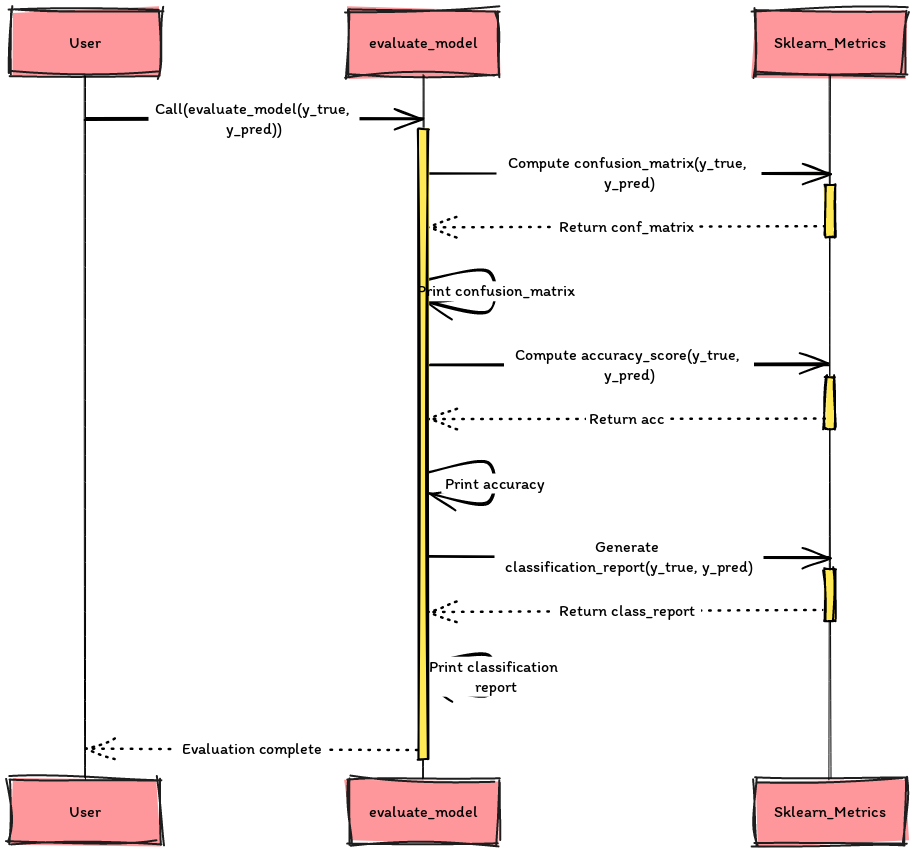

### Evaluate Model

In [30]:
evaluate_model(y_test, dt_predictions)

Confusion Matrix:
 [[512  33  11  10   0   7   6   0   0   0   0   0   0   1   1   0   2   0
    0   0   1   0   0   0   0   0   0   0   0]
 [ 39 485  12  10   0  14  13   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   0   0   0   0]
 [ 16  19 543  24   0   4   4   1   0   0   0   0   1   1   0   1   1   0
    0   0   0   0   1   1   0   0   0   0   0]
 [ 11  18  21 518   0  10   8   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   1   1   0   0   0   0   0]
 [  0   0   0   0 570   0   0   1   0   0   1   0   0   0   0   0   0   0
    1   2   0  20   0   0   0   1   0   3   3]
 [ 10  12   4   4   0 520  26   0   0   0   0   0   0   0   0   0   0   0
    0   0   2   0   0   0   0   1   1   0   0]
 [  9  12   2   8   0  14 532   3   1   0   0   0   2   0   0   0   0   0
    0   0   0   0   0   0   1   0   0   1   0]
 [  0   0   0   0   0   0   2 554   6   9   8   4   0   0   0   0   0   2
    1   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0

**Confusion Matrix**
The confusion matrix is a table used to describe the performance of a classification model. Each row of the matrix represents the instances in a predicted class, while each column represents the instances in an actual class.

For example:

Class 0: The model predicted 512 instances correctly as class 0, but it misclassified 33 instances as class 1, 11 as class 2, and so forth.
Class 4: The model performed exceptionally well in predicting class 4, with 570 correct predictions out of 602 instances, misclassifying very few into other classes.

**Accuracy**
The overall accuracy of 0.916 indicates that about 91.6% of all predictions made by the model are correct.

**Precision, Recall, and F1-Score**
These metrics provide a deeper understanding of the model's performance, particularly in terms of its ability to manage false positives and false negatives:

* Precision: Indicates the accuracy of positive predictions. For instance, for class 4, the precision is 0.95, meaning 95% of the predictions made by the model for class 4 are actually class 4.
* Recall (Sensitivity): Measures the ability of the model to identify all actual positives. For class 4, the recall is also 0.95, indicating it correctly identified 95% of all actual class 4 instances.
* F1-Score: A weighted average of precision and recall. An F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. Class 4 has an F1 score of 0.95, reflecting high precision and recall.

**Interpretation**
* High-Performing Classes: Classes like 4, 8, and 15 show very high precision, recall, and F1 scores, indicating the model is particularly effective at predicting these classes.
* Challenges: Some classes may have slightly lower scores in one or more metrics, indicating areas where the model might be struggling. For instance, class 24 has lower precision and F1-score compared to others, suggesting a relatively higher rate of false positives for this class.

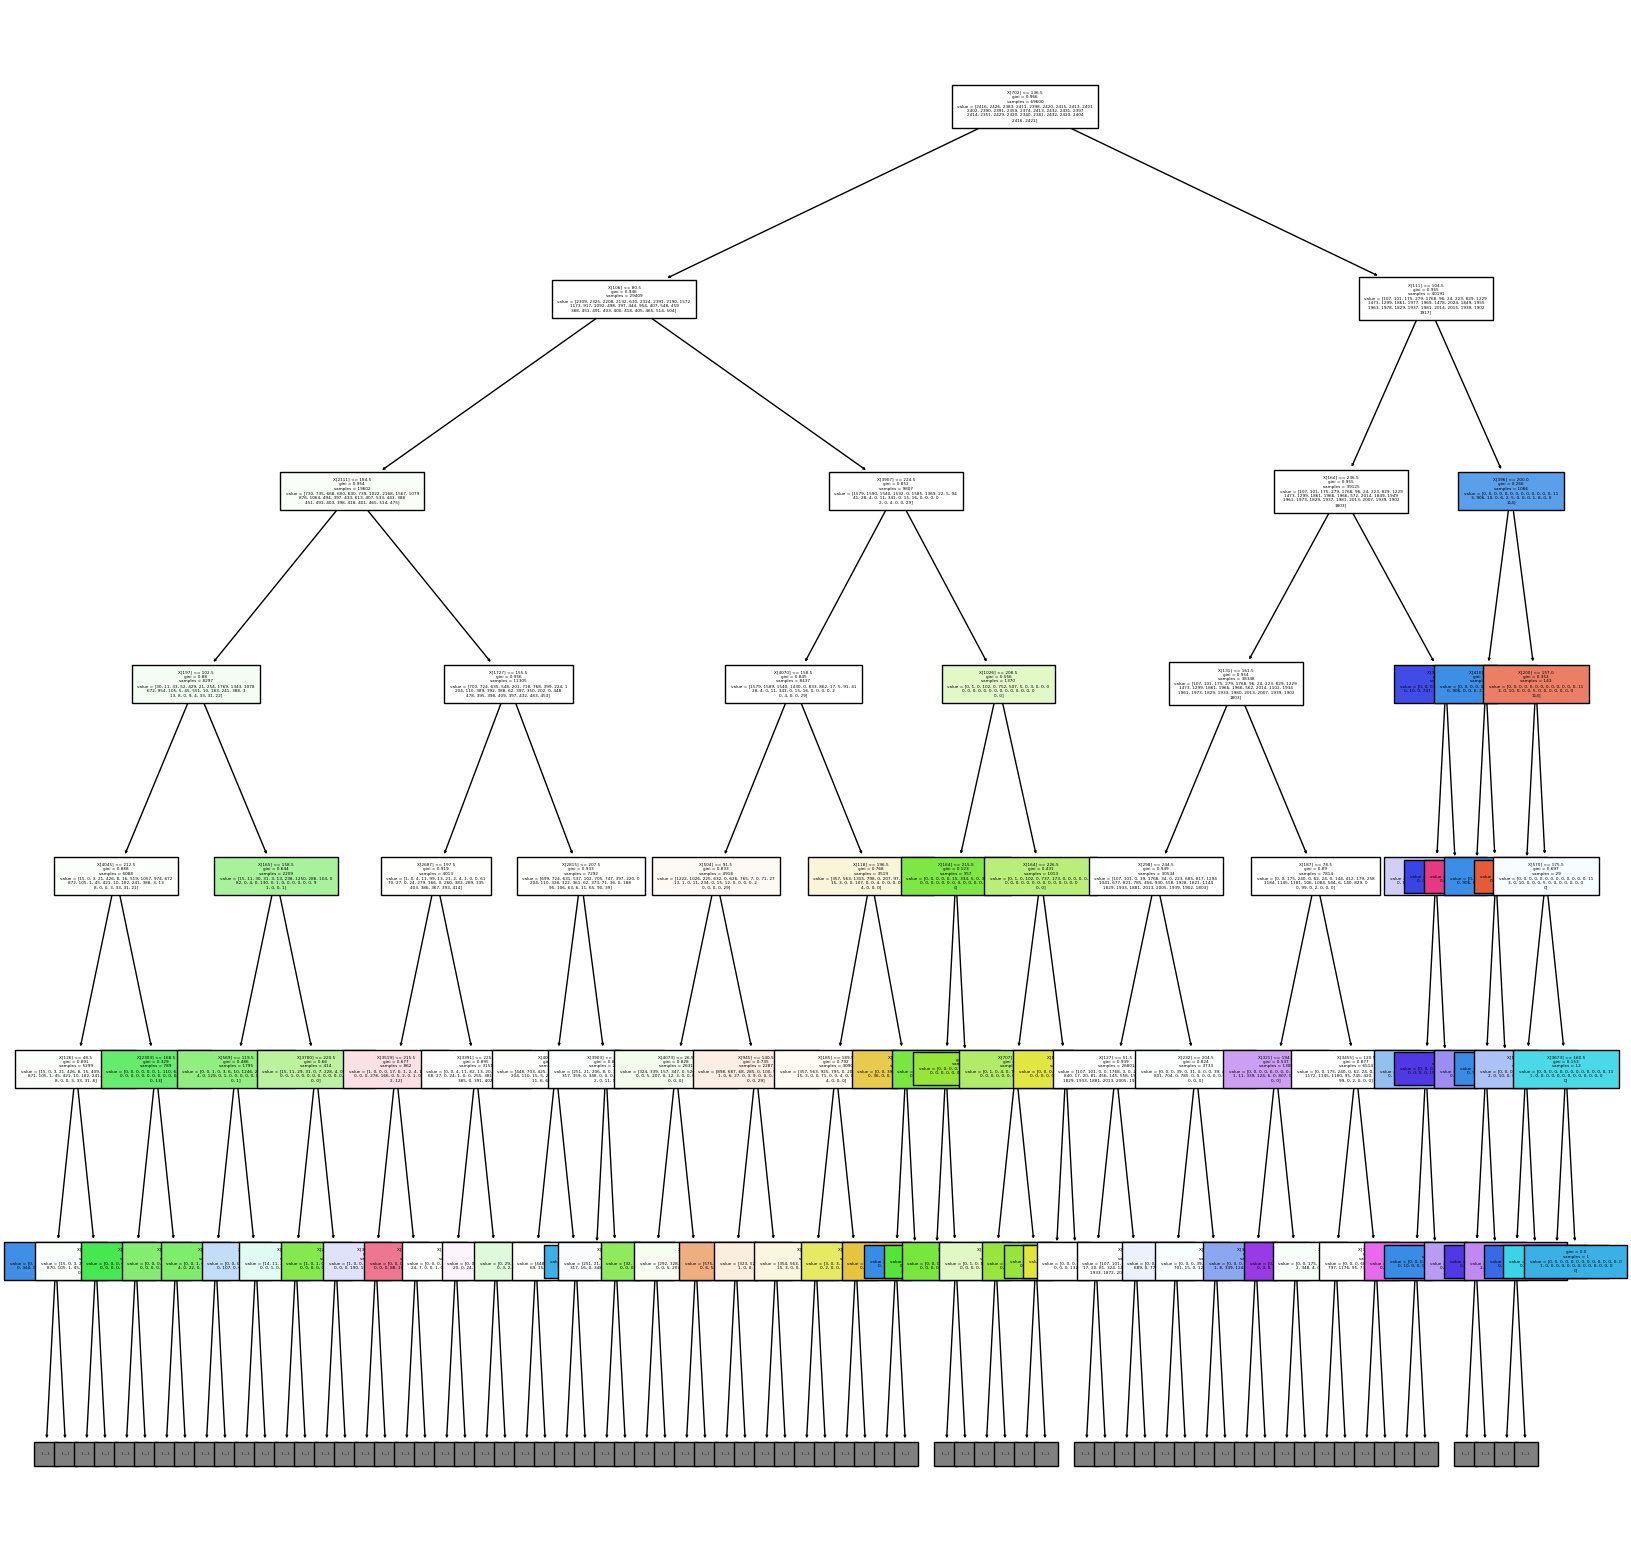

In [39]:
plt.figure(figsize=(20,20))
plot_tree(dt_classifier, filled=True, max_depth=6, fontsize=3)
plt.savefig('my-path')
plt.show()

### Create function for tranfrom text to sign language images

In [14]:
def load_data(image_path):
    return cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

def prepare_image(image, target_size=(64, 64)):
    if image is None:
        raise ValueError("Invalid image provided")
    image = cv2.resize(image, target_size)
    return image.flatten()

def predict_and_display(text, model, base_directory):
    for char in text.upper():
        directory_name = "space" if char == " " else char
        img_directory = os.path.join(base_directory, directory_name)

        if not os.path.exists(img_directory):
            print(f"Directory for '{char}' does not exist. Expected at: {img_directory}")
            continue

        image_files = os.listdir(img_directory)
        if not image_files:
            print(f"No images available for '{char}' in {img_directory}")
            continue

        image_file = image_files[0]
        full_path = os.path.join(img_directory, image_file)

        try:
            image = load_data(full_path)
            prepared_image = prepare_image(image)
            prediction = model.predict([prepared_image])
            predicted_label = np.argmax(prediction)

            plt.figure()
            plt.imshow(image, cmap='gray')
            plt.title(f"Predicted: {predicted_label} for {char} ({directory_name})")
            plt.axis('off')
            plt.show()
        except Exception as e:
            print(f"An error occurred while processing {full_path}: {e}")


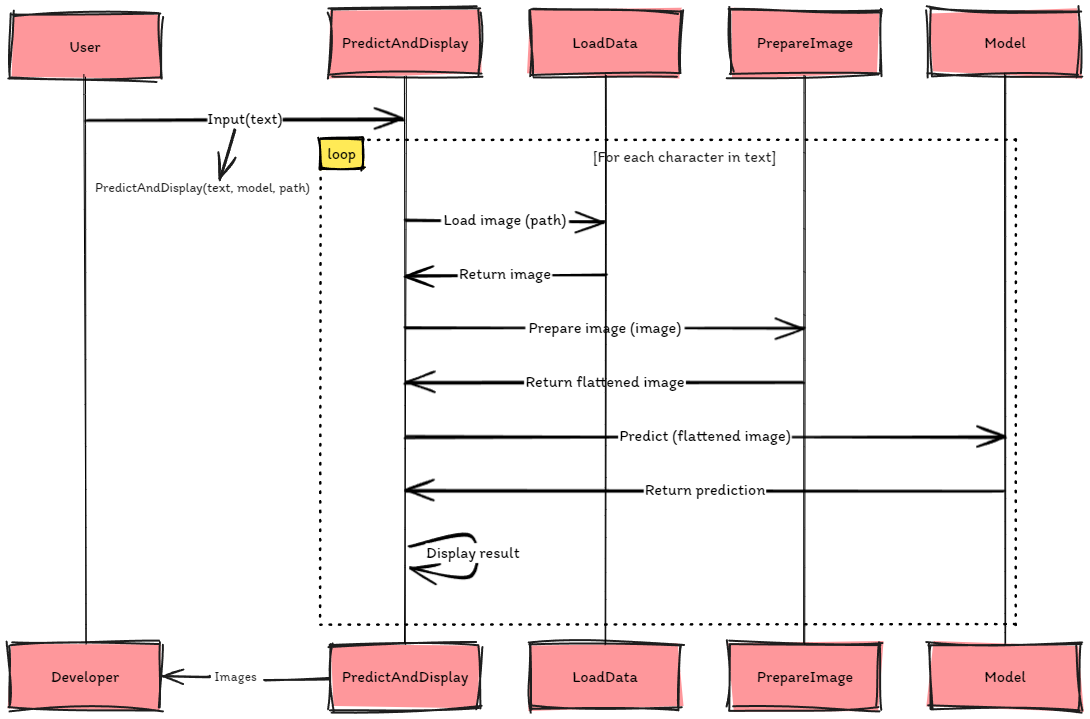

 Hello World


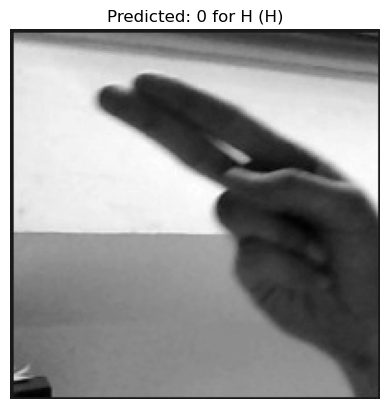

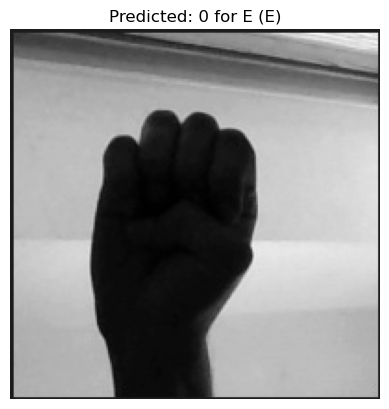

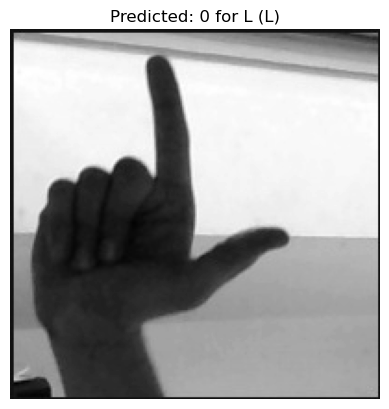

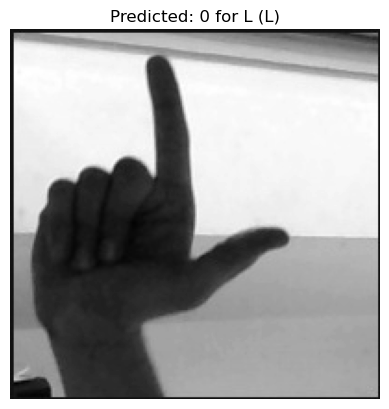

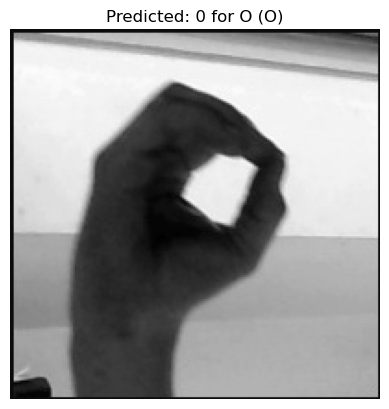

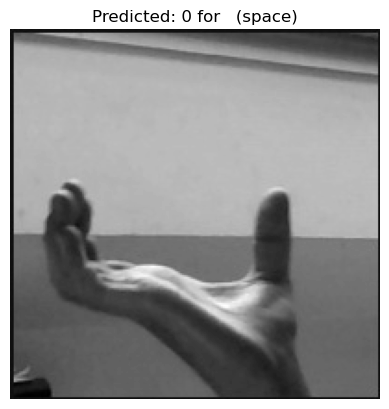

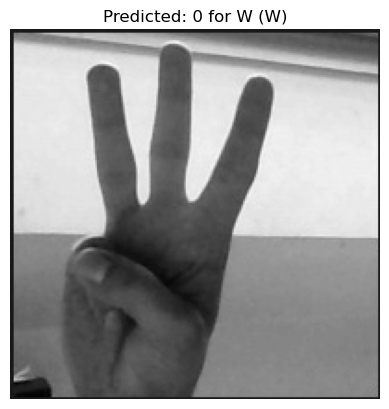

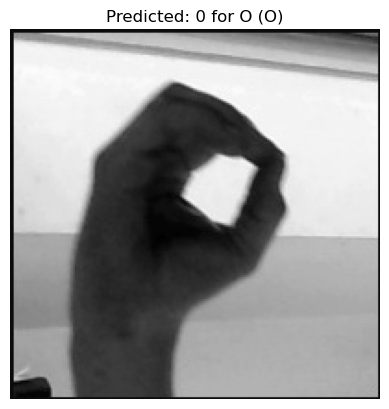

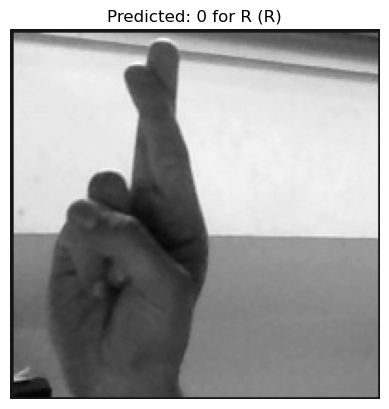

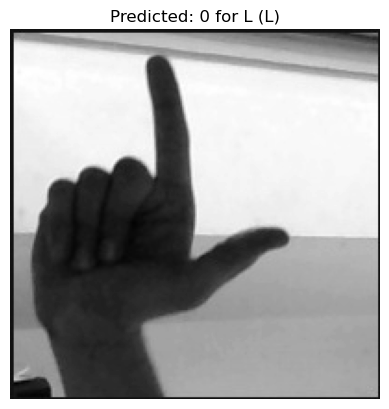

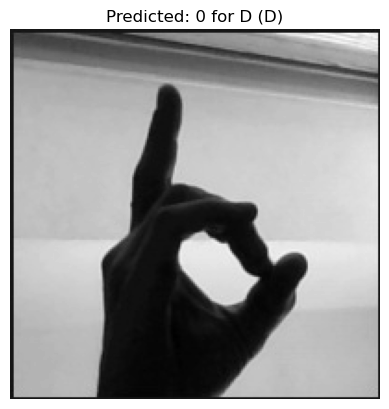

In [15]:
base_directory = "my-path"

model = dt_classifier
text_input = input()
predict_and_display(text_input, model, base_directory)

### CONCLUSION

We've made a sign language app that really helps people who are deaf or hard of hearing. This app uses a special method called Decision Trees to understand sign language. It's not just about helping people communicate; it also helps users to learn and socialize better. We plan to make the app even better by adding the ability to understand whole phrases and sentences. We also want to make the app smarter using better technology and make it easier for everyone to use. This project shows how machine learning can help improve how we communicate.

### SUGGESTION

Try New Models:
The Decision Tree got us 91.63%, it's important to explore difference models that might capture the complexities of sign language more effectively. Neural networks, especially Convolutional Neural Networks (CNNs), are used for their performance in image recognition and could higher accuracy. 

Use More Sign Languages:
Not everyone uses American signs, so we should include signs from other languages, like Thai, Chinese, and more. And we should add common hand signs that mean whole words or phrases.

Understand the Conversation:
Signs can mean different things depending on the situation. We could make the app smarter by helping it understand the whole conversation, not just letter.

Make It Work Both Ways:
The app should help people talk to each other, not just one way.